In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class AgglomerativeClustering:
    def __init__(self, n_clusters=2, threshold=100, linkage='average'):
        # linkage can be one of {'average', 'complete', 'single'}
        # if linkage value is higher than treshold the split is not being done
        self.n_clusters = n_clusters
        self.threshold = threshold
        self.linkage = linkage
    def fit_predict(self, X):
        # step 1. Consider all elements as a separate cluster
        # step 2. Calculate distance between each 2 clusters based on linkage method
        # step 3. Merge 2 closest clusters into single one, if their distance is lower than threshold
        # step 4. Repeat steps 2 and 3 while distance between 2 closes clusters is lower than threshold
        # Additional: If n_clusters is set to any integer, stop iterations when number of clusters is reached
        
        clusters = [[x] for x in range(len(X))]
        while len(clusters) > self.n_clusters:
            dist_mtrx = np.zeros((len(clusters), len(clusters)))
            for i in (range(len(clusters))):
                for j in range(i+1, len(clusters)):
                    if self.linkage == 'single':
                        dist_mtrx[i][j] = np.min(pairwise_distances(X[clusters[i]], X[clusters[j]]))
                    elif self.linkage == 'complete':
                        dist_mtrx[i][j] = np.max(pairwise_distances(X[clusters[i]], X[clusters[j]]))
                    elif self.linkage == 'average':
                        dist_mtrx[i][j] = np.mean(pairwise_distances(X[clusters[i]], X[clusters[j]]))
                    
                    dist_mtrx[j][i] = dist_mtrx[i][j]
                dist_mtrx[i][i] = np.max(dist_mtrx[i])
            
            #min_i, min_j = np.argmin(dist_mtrx)//len(dist_mtrx), np.argmin(dist_mtrx)%len(dist_mtrx)
            min_i, min_j =  np.unravel_index(np.argmin(dist_mtrx), dist_mtrx.shape)
            if np.min(dist_mtrx)>self.threshold:
                return clusters
            
            clusters[min_i].extend(clusters[min_j])
            del clusters[min_j] 
                
        return clusters
        

    

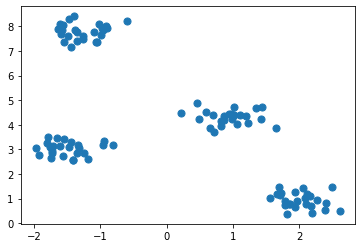

In [3]:
X, y_true = make_blobs(n_samples=100, centers=4,
                       cluster_std=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
agg_clustering = AgglomerativeClustering(n_clusters=2, threshold=2)
clusters = agg_clustering.fit_predict(X)

In [5]:
c = np.zeros(len(X))
for i in range(len(clusters)):
    c[clusters[i]] = i

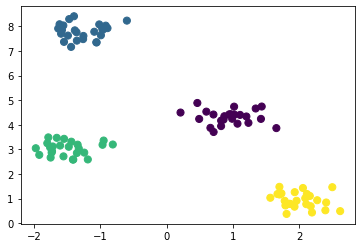

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=c, s=50, cmap='viridis')